# K_means Clustering Algorithms:

## Introduction:

K-means clustering is a popular unsupervised machine learning algorithm used to group data points into distinct clusters. The algorithm works by iteratively assigning each data point to the nearest cluster center, or centroid, and then recomputing the centroid based on the new groupings.

The "k" in k-means refers to the number of clusters that the algorithm should identify. The user specifies this number beforehand, and the algorithm tries to find the best way to partition the data into that number of clusters.

The k-means algorithm starts by randomly selecting k initial centroids from the data points. Then, it assigns each data point to the nearest centroid, creating k clusters. The algorithm then computes the new centroid for each cluster by taking the mean of all the data points assigned to it. This process of assigning data points to clusters and computing new centroids is repeated until the centroids no longer change or the maximum number of iterations is reached.

K-means clustering is widely used in fields such as data mining, machine learning, image analysis, and pattern recognition. It is a simple and effective way to group large datasets into meaningful clusters, but it is important to choose the right value of k and to understand the limitations of the algorithm.

## Intuition: 

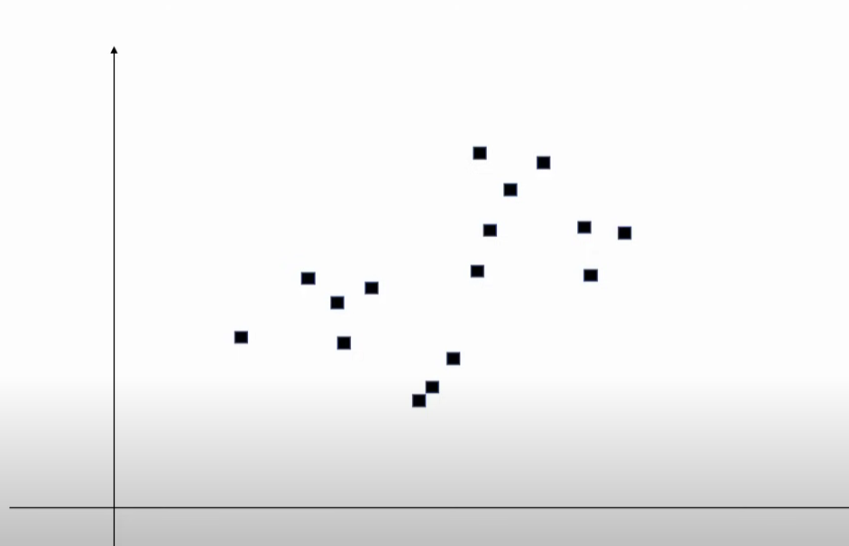

**Let us consider the above data points.** 

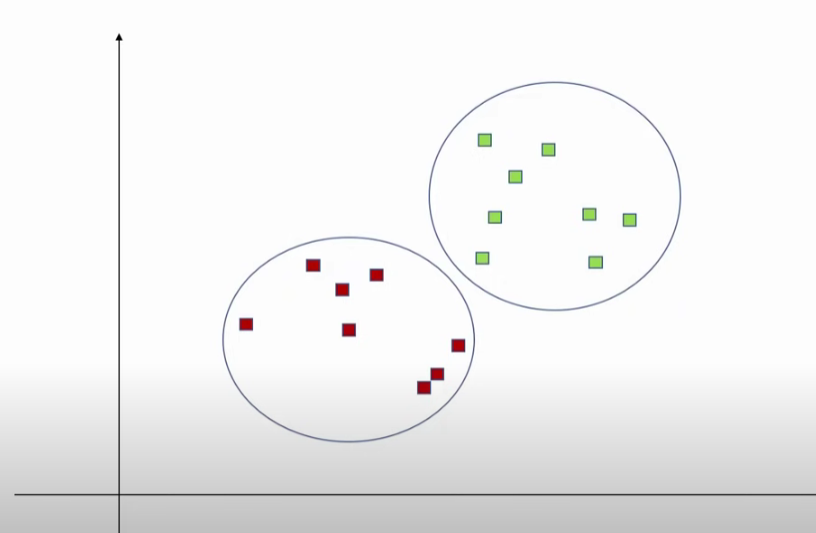

**This is our desired output.**

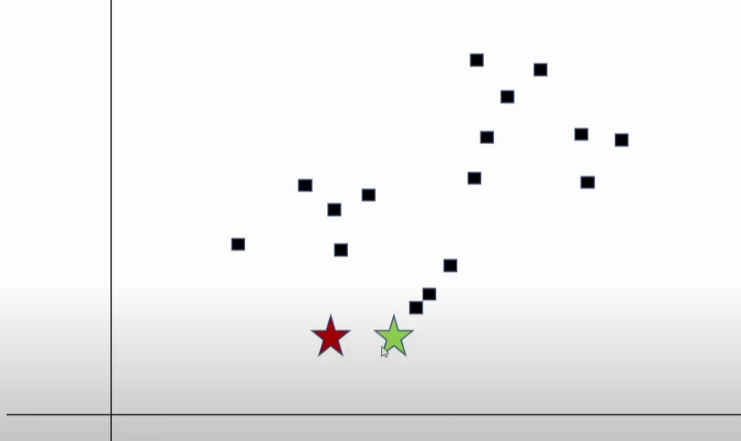

**1. Start with 'K' centroids by putting them at random place, Here K=2.**

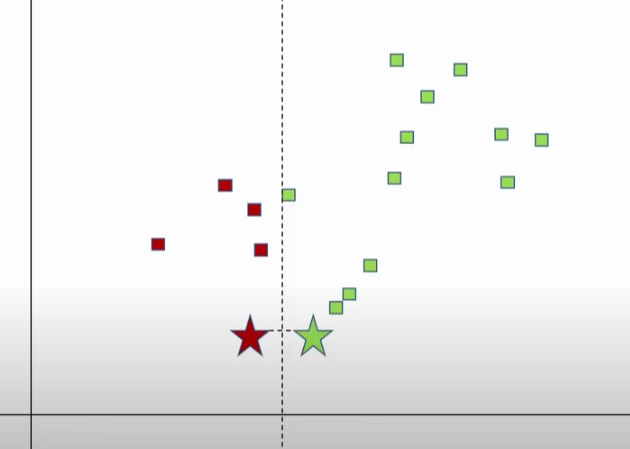

**2. Compute distance of every point from centroid and cluster them accordingly.**

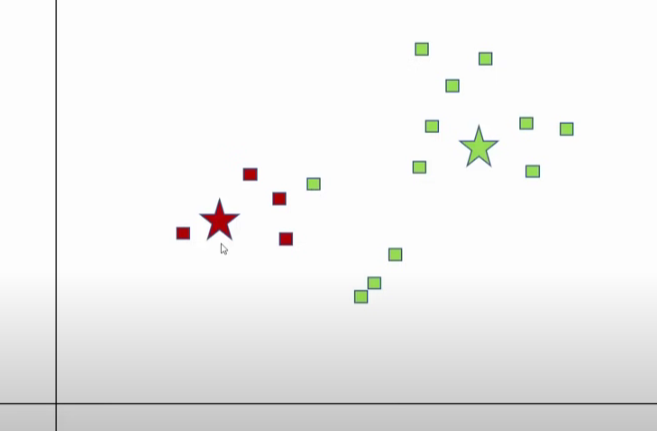

**3. Adjust centroids so that they become center of gravity for given cluster.**

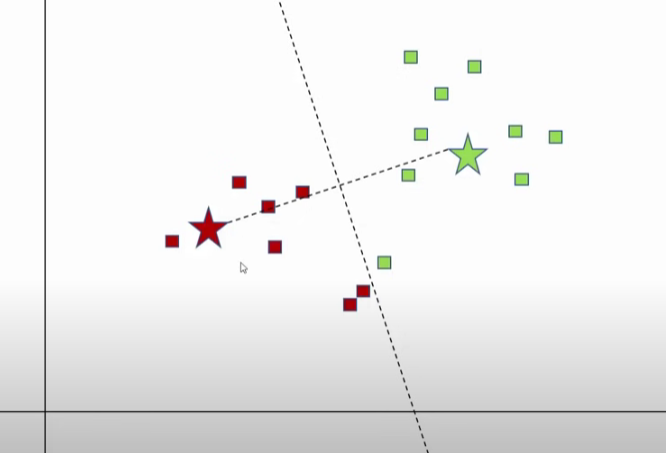

**4. Again re-cluster every opint based on their distance with centroid.**

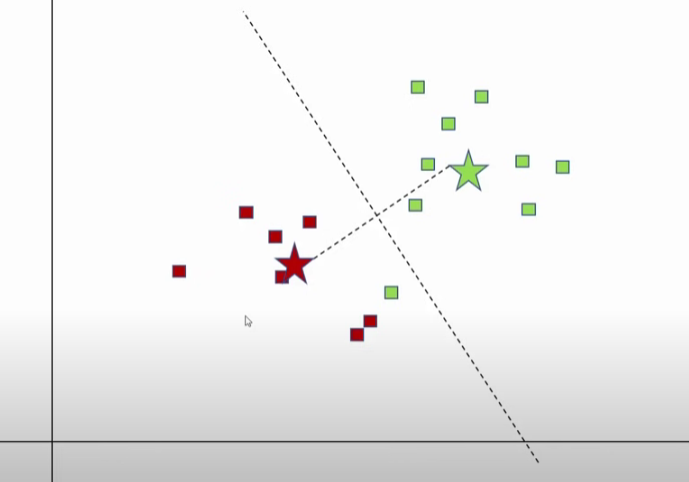

**5. Again adjust the centroids.**

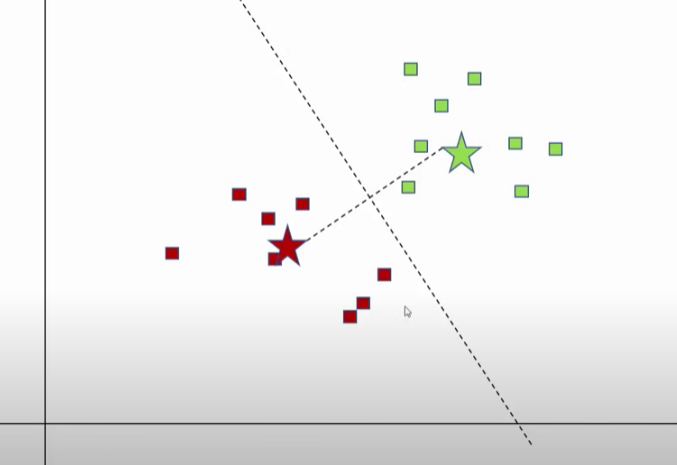

**6. Repeat until the position od centroids of the cluster converges. In this case, this is the convergent point.**

## How to determine correct number of clusters (K)?

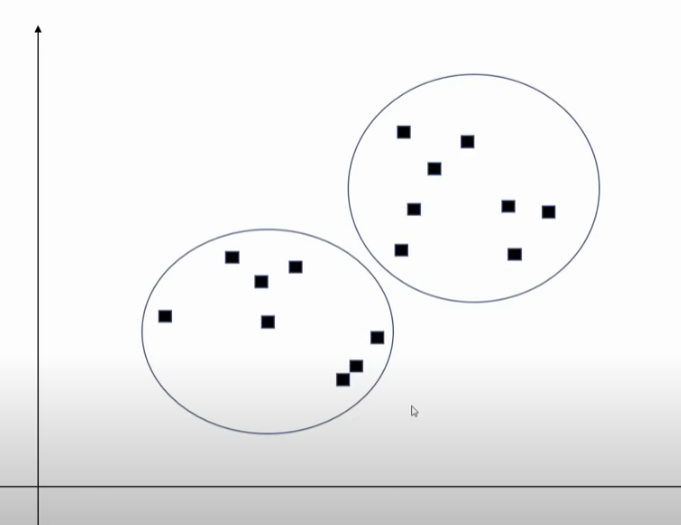

**Posibility 1: 2 clusters!**

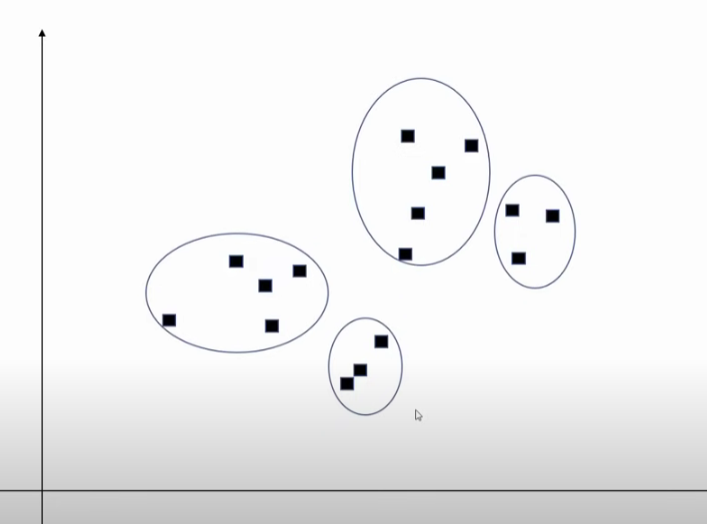

**Posibility 2: 4 clusters!**

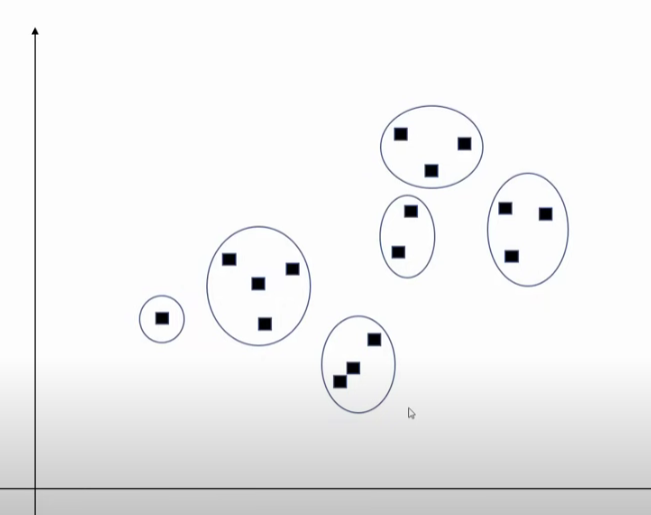

**Posibility 3: 6 clusters!**

### The answer is the Elbow method!!!

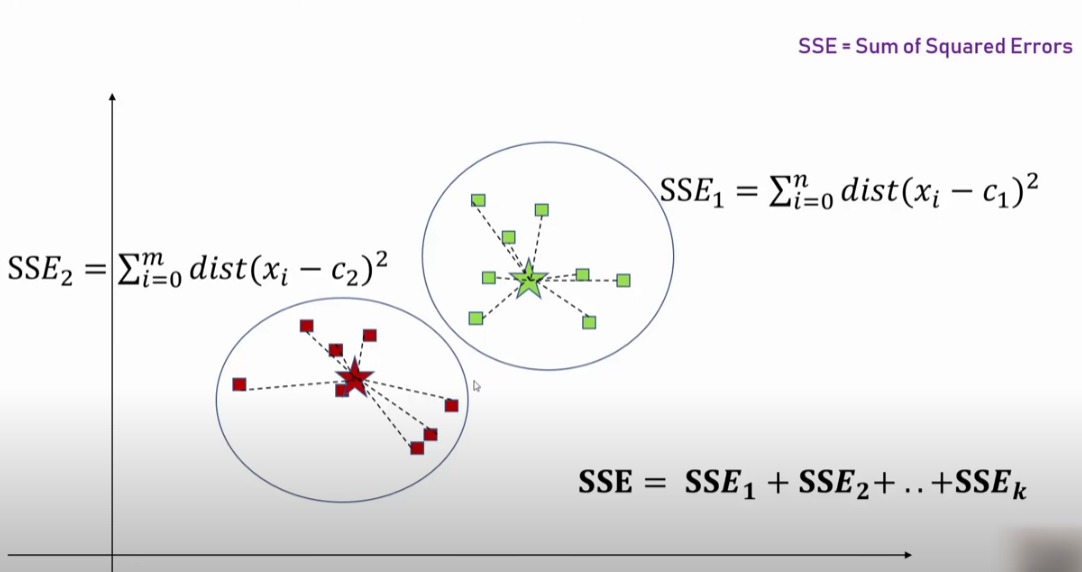

**The elbow method makes use of the SSE (Sum of Squared Errors) for each values of 'K' and plots the graph as follows:**

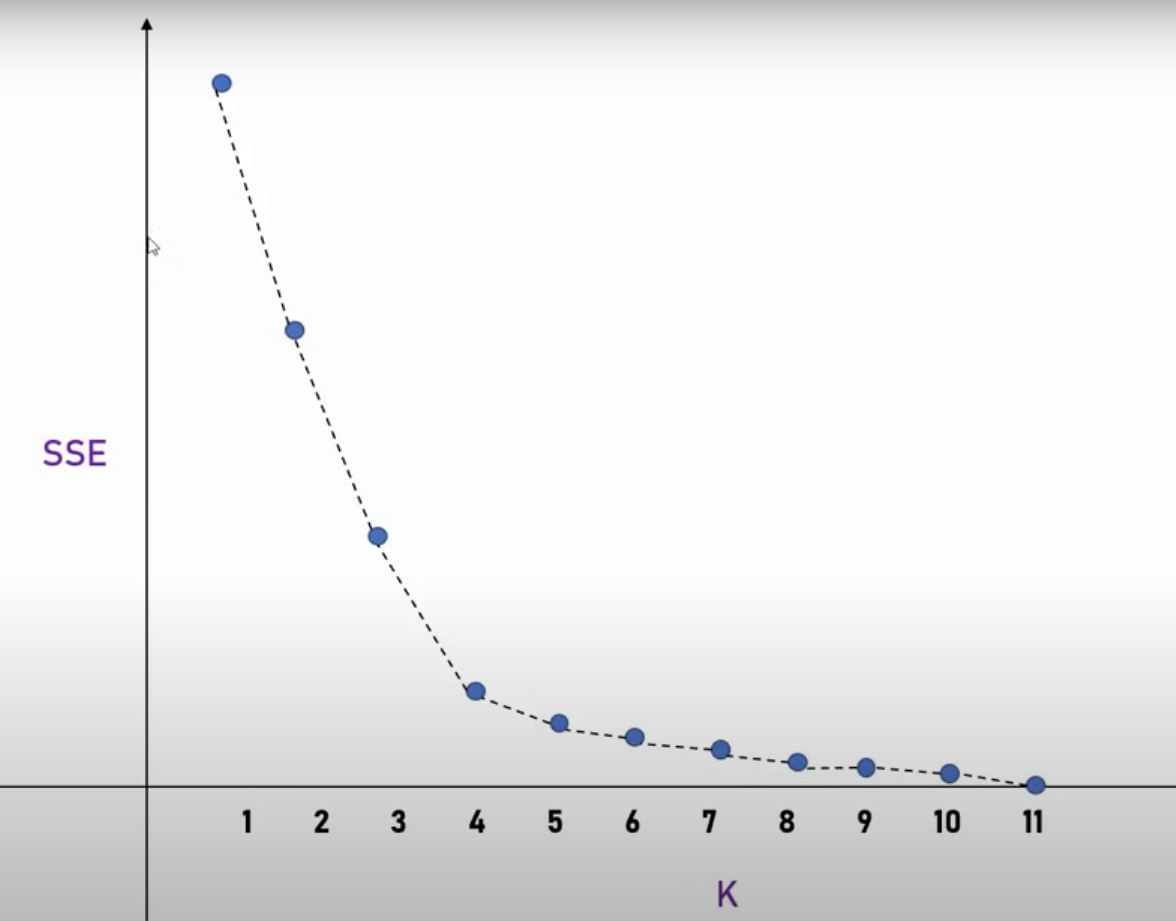

**Now we pick the elbow of the graph as the optimum value of "K"**

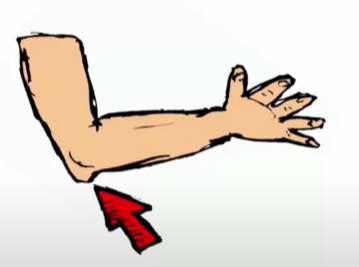

## Now, let's get into coding. YAYYYYY!!!!!!!!!

### Imports:

In [52]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [53]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


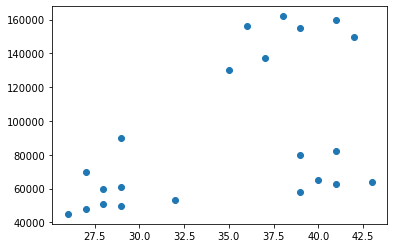

In [54]:
plt.scatter(df['Age'], df['Income($)'])

### Fitting & Training:

In [55]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [56]:
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

C:\Users\ASUS\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [57]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


### Plotting the predicted clusters:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


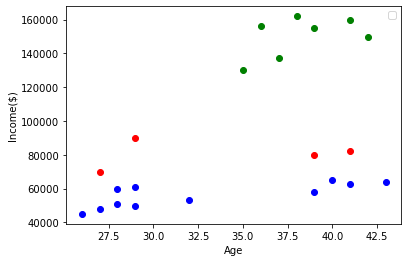

In [60]:
def plot_clusters(df, plot_centroid=False, km=None):
    ''' This function plots the clusters. '''

    cluster_0 = df[df.cluster==0]
    cluster_1 = df[df.cluster==1]
    cluster_2 = df[df.cluster==2]

    plt.scatter(cluster_0.Age, cluster_0['Income($)'], color='red')
    plt.scatter(cluster_1.Age, cluster_1['Income($)'], color='green')
    plt.scatter(cluster_2.Age, cluster_2['Income($)'], color='blue')
    
    if plot_centroid:
        plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='black', marker='*', label='centroid')

    plt.xlabel('Age')
    plt.ylabel('Income($)')
    plt.legend()
    
plot_clusters(df)

**Here, the prediction is not accurate because we have the scaling problem. The Age ranges from 20-45 but the Income ranges from 40,000-1,60,000.**

In [61]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df

,Name,Age,Income($),cluster
0,Rob,27,0.213675,0
1,Michael,29,0.384615,0
2,Mohan,29,0.136752,2
3,Ismail,28,0.128205,2
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [62]:
scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


**Here, we scaled the columns Age and Income between the range 0-1**

### Training the scaled data:

In [63]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

C:\Users\ASUS\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [64]:
df['cluster'] = y_pred
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


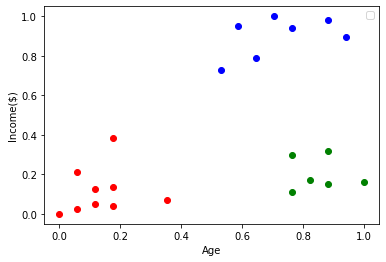

In [65]:
plot_clusters(df)

**Now the model works fine!!!**

### Plotting the centriods:

In [66]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

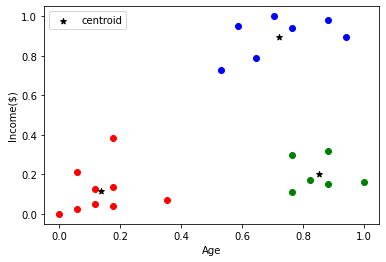

In [68]:
plot_clusters(df, plot_centroid=True, km=km)

### Determining the elbow:

In [70]:
k_range = range(1, 10)
sse = []

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_) # SSE

C:\Users\ASUS\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMe

In [71]:
sse

[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.34910470944195654,
 0.2621792762345213,
 0.22020960864009398,
 0.1685851223602976,
 0.139888452061285,
 0.11190781744710708]

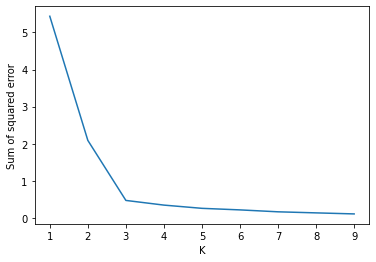

In [72]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range, sse)

**Therefore, the elbow is verified!!!**